[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [3]:
df = pd.read_csv("athlete_events.csv")

In [4]:
df.shape

(271116, 15)

In [5]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [6]:
df1 = df.copy()

In [7]:
df1 = df1.drop_duplicates()

### Find the missing data in each column

In [8]:
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### plot the Number of males and females

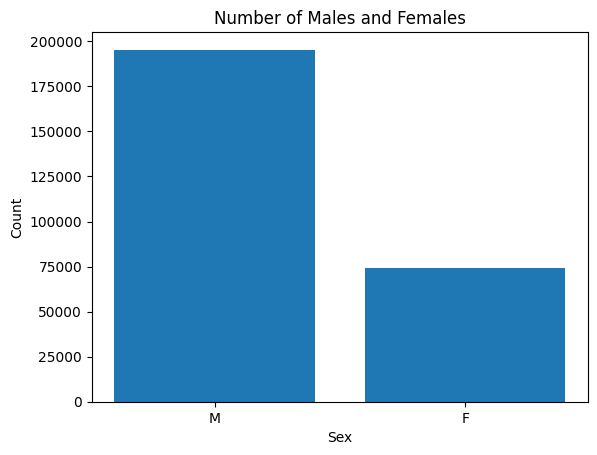

In [9]:
counts = df1['Sex'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.show()

### How many cities do we have and what are they ?

In [10]:
print(df1['City'].nunique())
df1['City'].unique()

42


array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

### Find the number of athlete for each year and plot them

In [11]:
number_of_athlete_each_year = df1.groupby('Year')['Name'].count()
number_of_athlete_each_year

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Name, dtype: int64

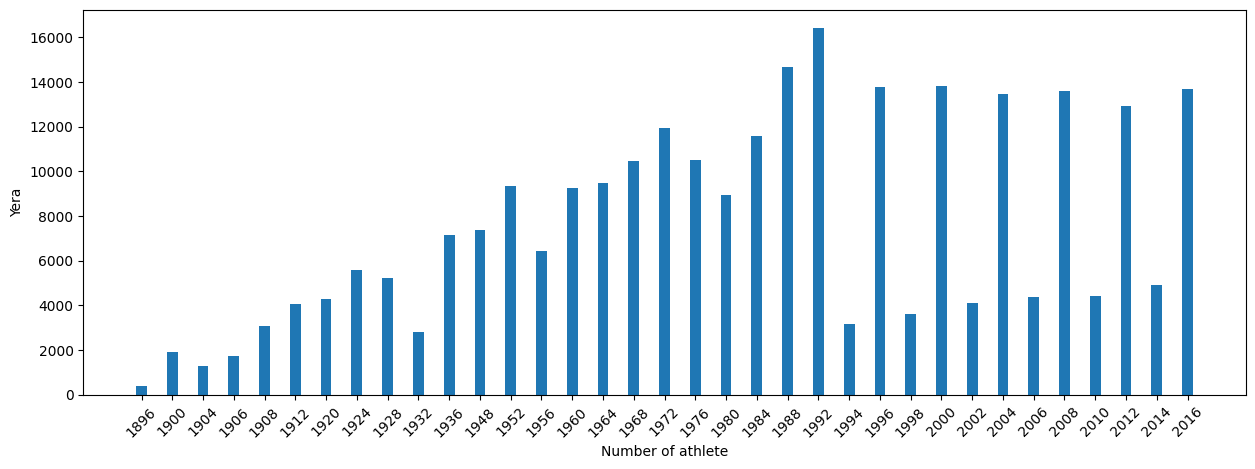

In [12]:
plt.figure(figsize=(15,5))
plt.bar(range(len(number_of_athlete_each_year)) , number_of_athlete_each_year.values,width = 0.35)
plt.xticks(range(len(number_of_athlete_each_year)),number_of_athlete_each_year.index,rotation=45)
plt.xlabel('Number of athlete')
plt.ylabel('Yera')
plt.show()

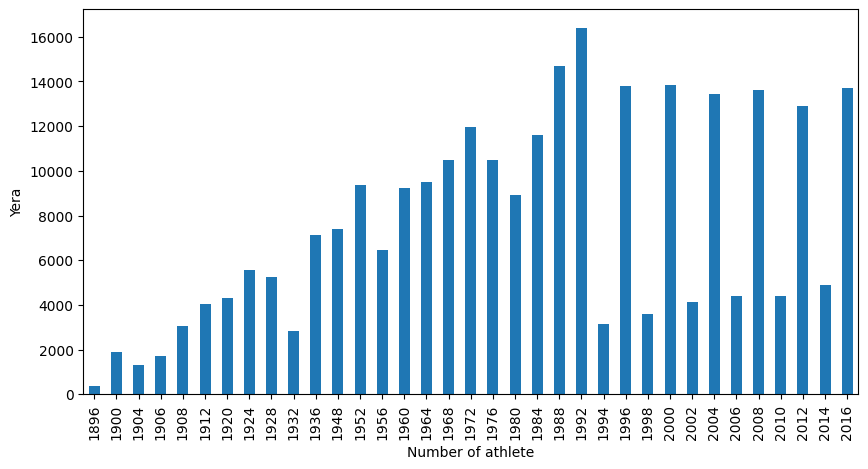

In [13]:
number_of_athlete_each_year.plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Number of athlete')
plt.ylabel('Yera')
plt.show()

### Which athlete participated the most? (his/her name and ID)


In [14]:
print(df1['Name'].mode()[0])
athlete_participated_most = df1['Name'].value_counts().idxmax()
athlete_participated_most

Heikki Ilmari Savolainen


'Heikki Ilmari Savolainen'

In [15]:
ID = df1.ID[df1['Name'] == athlete_participated_most].unique()[0]
ID

106296

### Find the number of each medal for each year.

In [16]:
number_of_each_medal_each_year = df1.groupby(['Year','Medal']).size().unstack(level=1)
number_of_each_medal_each_year.columns = ['N_Bronze','N_Gold','N_Silver']
number_of_each_medal_each_year

,N_Bronze,N_Gold,N_Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156
1908,256,294,281
1912,300,326,315
1920,367,493,448
1924,311,332,319
1928,281,275,267


### plot the previous table

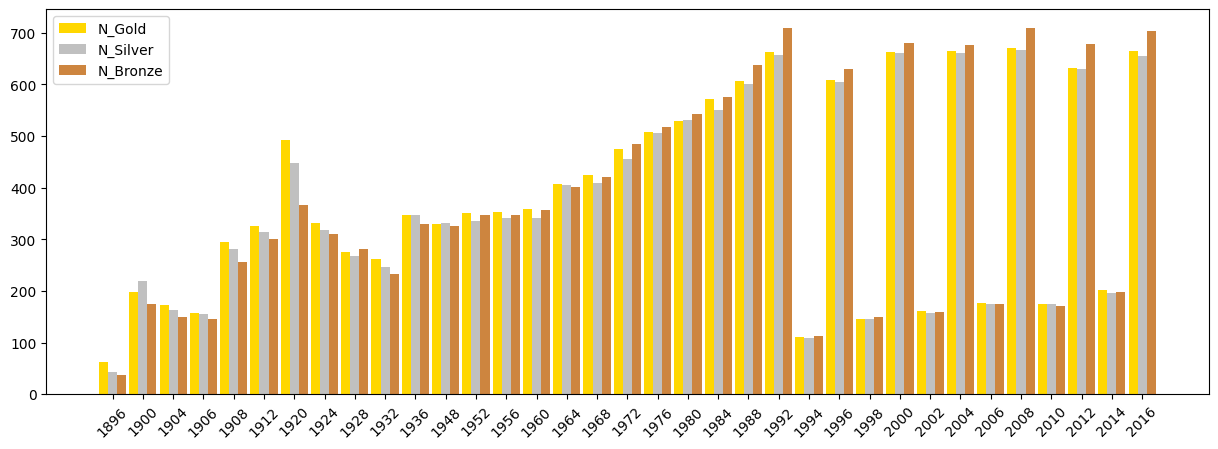

In [17]:
width = 0.3
positions = np.arange(len(number_of_each_medal_each_year))
plt.figure(figsize=(15,5))
plt.bar(positions-width,number_of_each_medal_each_year['N_Gold'],label='N_Gold',width=0.3,color='gold')
plt.bar(positions,number_of_each_medal_each_year['N_Silver'],label='N_Silver',width=0.3,color='silver')
plt.bar(positions+width,number_of_each_medal_each_year['N_Bronze'],label='N_Bronze',width=0.3,color='peru')
plt.xticks(positions,number_of_each_medal_each_year.index,rotation=45)
plt.legend()
plt.show()